In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) 
cf.go_offline()

In [2]:
soccer=pd.read_csv(r"C:\Users\shaik\Downloads\spi_matches.csv")
soccer.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,0.2767,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,0.3608,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,0.2487,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,0.2699,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,0.3157,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
soccer.shape

(54411, 23)

In [4]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54411 entries, 0 to 54410
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       54411 non-null  int64  
 1   date         54411 non-null  object 
 2   league_id    54411 non-null  int64  
 3   league       54411 non-null  object 
 4   team1        54411 non-null  object 
 5   team2        54411 non-null  object 
 6   spi1         54411 non-null  float64
 7   spi2         54411 non-null  float64
 8   prob1        54411 non-null  float64
 9   prob2        54411 non-null  float64
 10  probtie      54411 non-null  float64
 11  proj_score1  54411 non-null  float64
 12  proj_score2  54411 non-null  float64
 13  importance1  44717 non-null  float64
 14  importance2  44717 non-null  float64
 15  score1       49932 non-null  float64
 16  score2       49932 non-null  float64
 17  xg1          26859 non-null  float64
 18  xg2          26859 non-null  float64
 19  nsxg

In [5]:
soccer.describe()

,season,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,54411.000000,54411.000000,54411.000000,54411.000000,54411.000000,54411.000000,54411.000000,54411.000000,54411.000000,44717.000000,44717.000000,49932.000000,49932.000000,26859.000000,26859.000000,26859.000000,26859.000000,26859.000000,26859.000000
mean,2018.975703,2203.540387,44.078578,44.033838,0.442183,0.304587,0.253230,1.498092,1.175920,31.891963,31.218986,1.503345,1.186714,1.490099,1.181673,1.388442,1.137407,1.521371,1.199224
std,1.477341,983.426401,19.158993,19.167891,0.157768,0.143880,0.047463,0.424657,0.418513,26.030511,25.739059,1.274005,1.139718,0.831095,0.740096,0.649872,0.578237,1.238376,1.126524
min,2016.000000,1818.000000,3.880000,4.040000,0.027000,0.003200,0.000000,0.210000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,1854.000000,30.195000,30.150000,0.340700,0.209850,0.234900,1.220000,0.910000,11.900000,11.400000,1.000000,0.000000,0.870000,0.630000,0.930000,0.730000,1.050000,0.000000
50%,2019.000000,1874.000000,41.960000,41.850000,0.433000,0.288900,0.260800,1.440000,1.120000,26.700000,25.800000,1.000000,1.000000,1.360000,1.050000,1.300000,1.050000,1.050000,1.050000
75%,2020.000000,2160.000000,57.430000,57.340000,0.532800,0.381500,0.282000,1.700000,1.390000,45.900000,45.200000,2.000000,2.000000,1.960000,1.580000,1.730000,1.440000,2.100000,2.100000
max,2021.000000,10281.000000,96.570000,96.780000,0.977500,0.899200,0.453700,4.900000,4.130000,100.000000,100.000000,11.000000,13.000000,7.070000,8.270000,6.890000,7.170000,9.150000,11.050000


In [6]:
soccer.isnull().sum()

season             0
date               0
league_id          0
league             0
team1              0
team2              0
spi1               0
spi2               0
prob1              0
prob2              0
probtie            0
proj_score1        0
proj_score2        0
importance1     9694
importance2     9694
score1          4479
score2          4479
xg1            27552
xg2            27552
nsxg1          27552
nsxg2          27552
adj_score1     27552
adj_score2     27552
dtype: int64

#There are null values in above columns like
importance1, importance2,score1,score2,xg1,xg2,nsxg1,
nsxg2, adj_score1, adj_score2..

In [7]:
soccer.columns

Index(['season', 'date', 'league_id', 'league', 'team1', 'team2', 'spi1',
       'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

In [8]:
del soccer['importance1']
del soccer['importance2']
del soccer['xg1']
del soccer['xg2']
del soccer['nsxg1']
del soccer['nsxg2']
del soccer['adj_score1']
del soccer['adj_score2']
del soccer['score1']
del soccer['score2']


1. deleted the null values 

In [9]:
soccer.duplicated().sum()

0

In [10]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54411 entries, 0 to 54410
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       54411 non-null  int64  
 1   date         54411 non-null  object 
 2   league_id    54411 non-null  int64  
 3   league       54411 non-null  object 
 4   team1        54411 non-null  object 
 5   team2        54411 non-null  object 
 6   spi1         54411 non-null  float64
 7   spi2         54411 non-null  float64
 8   prob1        54411 non-null  float64
 9   prob2        54411 non-null  float64
 10  probtie      54411 non-null  float64
 11  proj_score1  54411 non-null  float64
 12  proj_score2  54411 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 5.4+ MB


In [11]:
soccer.isnull().sum()

season         0
date           0
league_id      0
league         0
team1          0
team2          0
spi1           0
spi2           0
prob1          0
prob2          0
probtie        0
proj_score1    0
proj_score2    0
dtype: int64

In [12]:
soccer.columns

Index(['season', 'date', 'league_id', 'league', 'team1', 'team2', 'spi1',
       'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2'],
      dtype='object')

<AxesSubplot:>

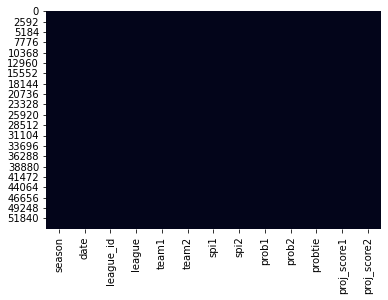

In [13]:
sns.heatmap(soccer.isnull(), cbar=False)

1. No null values found

In [14]:
soccer.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2
0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,0.2767,0.2844,1.39,1.05
1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,0.3608,0.2819,1.27,1.28
2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,0.2487,0.2714,1.53,1.03
3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,0.2699,0.3013,1.27,0.94
4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,0.3157,0.2719,1.45,1.24


<AxesSubplot:ylabel='season'>

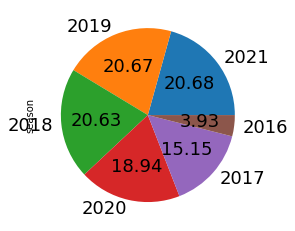

In [15]:
soccer.season.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')

1. In Season Year 2021 has high value count 20.68

In [16]:
soccer.season.value_counts().head(30).iplot(kind="bar")

1. As above pie chart as plotted a bar graph to better understanding 
   season year 2021 has high value count

In [17]:
soccer.league_id.value_counts().head(30).iplot(kind="box")

1. Above box plot shows the max and min value count of League

In [18]:
soccer.describe()

,season,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2
count,54411.000000,54411.000000,54411.000000,54411.000000,54411.000000,54411.000000,54411.000000,54411.000000,54411.000000
mean,2018.975703,2203.540387,44.078578,44.033838,0.442183,0.304587,0.253230,1.498092,1.175920
std,1.477341,983.426401,19.158993,19.167891,0.157768,0.143880,0.047463,0.424657,0.418513
min,2016.000000,1818.000000,3.880000,4.040000,0.027000,0.003200,0.000000,0.210000,0.200000
25%,2018.000000,1854.000000,30.195000,30.150000,0.340700,0.209850,0.234900,1.220000,0.910000
50%,2019.000000,1874.000000,41.960000,41.850000,0.433000,0.288900,0.260800,1.440000,1.120000
75%,2020.000000,2160.000000,57.430000,57.340000,0.532800,0.381500,0.282000,1.700000,1.390000
max,2021.000000,10281.000000,96.570000,96.780000,0.977500,0.899200,0.453700,4.900000,4.130000


In [19]:
soccer[soccer.spi1>50].sort_values(ascending=False,by="spi1")

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2
152,2016,2016-09-10,1869,Spanish Primera Division,Barcelona,Alavés,96.57,62.33,0.9657,0.0059,0.0284,3.52,0.20
272,2016,2016-09-21,1869,Spanish Primera Division,Barcelona,Atletico Madrid,96.49,90.60,0.6809,0.1235,0.1955,2.04,0.87
545,2016,2016-10-29,1869,Spanish Primera Division,Barcelona,Granada,96.46,49.82,0.9775,0.0037,0.0188,4.03,0.21
455,2016,2016-10-19,1818,UEFA Champions League,Barcelona,Manchester City,96.37,87.97,0.6421,0.1717,0.1862,2.68,0.98
42,2016,2016-08-20,1869,Spanish Primera Division,Barcelona,Real Betis,96.35,69.95,0.9591,0.0071,0.0337,3.40,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14502,2018,2018-10-14,2105,Brasileiro Série A,Vasco da Gama,Cruzeiro,50.01,56.93,0.4801,0.2506,0.2692,1.38,0.92
30672,2019,2020-03-01,1854,Italy Serie A,Lecce,Atalanta,50.01,81.71,0.1405,0.6891,0.1704,1.20,2.74
10607,2017,2018-05-12,1843,French Ligue 1,Strasbourg,Lyon,50.01,77.93,0.1840,0.6013,0.2148,1.08,2.11
13238,2018,2018-09-16,2105,Brasileiro Série A,Botafogo,América Mineiro,50.01,42.33,0.5788,0.1660,0.2551,1.51,0.67


In [20]:
x=soccer[soccer.spi1>50] 
x=x.sort_values(ascending=False,by="spi1")
x=x.season.value_counts()

In [21]:
x.iplot(kind="bar")

1. Sorted values of SPI1 >50 to get value count
2. SPI1 has highest value count in year 2018 (3785)

In [22]:
soccer[soccer.spi1>50].league_id.value_counts().iplot(kind="box")

1. The above box plot shows the max and min value count

In [23]:
x=soccer[soccer.spi2>50] 
x=x.sort_values(ascending=False,by="spi2")
x=x.season.value_counts()

In [24]:
x.iplot(kind="bar")

1. Sorted values of SPI2 >50 to get value count
2. SPI2 has highest value count in year 2018 (3799)

In [25]:
soccer[soccer.spi2>50].league_id.value_counts().iplot(kind="box")

1. The above box plot shows the max and min value count

In [26]:
league=pd.crosstab(soccer['league'],soccer['team1'])
league.iplot(kind="bar",barmode="stack")

1. a crosstab is plotted wrf to league and team 1

In [27]:
league

team1,1. FC Heidenheim 1846,1. FC Kaiserslautern,1. FC Magdeburg,1. FC Nürnberg,1. FC Union Berlin,AC Ajaccio,AC Horsens,AC Milan,AD Alcorcon,ADO Den Haag,...,Würzburger Kickers,Yeni Malatyaspor,Yeovil Town,Yeovil Town Ladies,Yokohama F. Marinos,Yokohama FC,Young Boys,Zenit St Petersburg,Zlín,Östersunds FK
league,,,,,,,,,,,,,,,,,,,,,
Argentina Primera Division,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Australian A-League,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Austrian T-Mobile Bundesliga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Barclays Premier League,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgian Jupiler League,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brasileiro Série A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chinese Super League,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Danish SAS-Ligaen,0,0,0,0,0,0,49,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dutch Eredivisie,0,0,0,0,0,0,0,0,0,68,...,0,0,0,0,0,0,0,0,0,0


In [28]:
soccer.sort_values(ascending=False,by="team2").head(10)

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2
26830,2019,2019-11-02,1874,Swedish Allsvenskan,IFK Goteborg,Östersunds FK,32.47,23.03,0.4486,0.2652,0.2862,1.40,1.01
24187,2019,2019-08-30,1874,Swedish Allsvenskan,Helsingborgs IF,Östersunds FK,18.79,25.35,0.3872,0.3323,0.2805,1.35,1.23
9399,2018,2018-04-08,1874,Swedish Allsvenskan,Dalkurd FF,Östersunds FK,21.95,50.09,0.1773,0.5951,0.2276,0.89,1.84
11305,2018,2018-07-14,1874,Swedish Allsvenskan,Malmo FF,Östersunds FK,50.12,48.23,0.4800,0.2718,0.2482,1.64,1.17
1915,2017,2017-04-16,1874,Swedish Allsvenskan,Orebro SK,Östersunds FK,34.56,37.87,0.4170,0.3465,0.2365,1.68,1.51
48077,2021,2021-10-30,1874,Swedish Allsvenskan,Varbergs BoIS FC,Östersunds FK,24.85,13.88,0.6089,0.1447,0.2464,1.77,0.72
32596,2020,2020-07-11,1874,Swedish Allsvenskan,Falkenbergs FF,Östersunds FK,14.44,20.24,0.3082,0.4087,0.2830,1.15,1.37
13452,2018,2018-09-22,1874,Swedish Allsvenskan,IK Sirius,Östersunds FK,18.85,45.98,0.1965,0.6068,0.1968,1.30,2.38
33708,2020,2020-08-23,1874,Swedish Allsvenskan,IF Elfsborg,Östersunds FK,35.71,23.92,0.4997,0.2399,0.2604,1.65,1.06
6527,2017,2017-12-07,1820,UEFA Europa League,Hertha Berlin,Östersunds FK,64.41,50.44,0.5982,0.1629,0.2389,1.84,0.84


In [29]:
soccer["season"].value_counts().head(20).iplot(kind="bar")

1. Season Year value count has plotted with head(20)

In [30]:
soccer["spi1"].mean()

44.078578228667

Mean value of SPI1 is 44.07

In [31]:
soccer[(soccer["spi1"]<=soccer["spi1"].mean()) & (soccer["season"]>=4) ].sort_values(by=["season"],ascending=False)

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2
54410,2021,2022-05-29,1871,Spanish Segunda Division,Sporting Gijón,Las Palmas,27.66,35.35,0.3269,0.3652,0.3079,1.10,1.18
46458,2021,2021-09-24,5641,Argentina Primera Division,Sarmiento,Velez Sarsfield,33.28,50.07,0.2379,0.4946,0.2675,0.95,1.49
46460,2021,2021-09-24,5641,Argentina Primera Division,Estudiantes,Platense,43.15,30.00,0.5785,0.1705,0.2510,1.63,0.76
46461,2021,2021-09-24,1952,Mexican Primera Division Torneo Apertura,Puebla,Cruz Azul,40.65,55.19,0.3006,0.4081,0.2913,1.01,1.23
46462,2021,2021-09-24,1952,Mexican Primera Division Torneo Apertura,Tijuana,Mazatlán FC,42.14,35.17,0.4913,0.2425,0.2662,1.49,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,2016,2017-04-11,1975,Mexican Primera Division Torneo Clausura,Veracruz,Puebla,30.91,37.38,0.3543,0.3644,0.2813,1.40,1.39
1842,2016,2017-04-11,1975,Mexican Primera Division Torneo Clausura,Chiapas FC,León,29.93,41.18,0.2943,0.4375,0.2683,1.38,1.61
1834,2016,2017-04-09,1975,Mexican Primera Division Torneo Clausura,Santos Laguna,Pachuca,41.62,44.97,0.4037,0.3140,0.2824,1.38,1.23
1801,2016,2017-04-08,1975,Mexican Primera Division Torneo Clausura,Guadalajara,Puebla,43.48,37.34,0.5013,0.2250,0.2737,1.56,0.96


In [32]:
soccer["spi2"].mean()

44.03383801069637

Mean Value of SPI2 is 44.03

In [33]:
soccer[(soccer["spi2"]<=soccer["spi2"].mean()) & (soccer["season"]>=4) ].sort_values(by=["season"],ascending=False)

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2
54410,2021,2022-05-29,1871,Spanish Segunda Division,Sporting Gijón,Las Palmas,27.66,35.35,0.3269,0.3652,0.3079,1.10,1.18
46477,2021,2021-09-25,1856,Italy Serie B,Ascoli,Brescia,29.09,41.10,0.2828,0.4410,0.2762,1.31,1.69
46479,2021,2021-09-25,1856,Italy Serie B,Monza,Pordenone Calcio,41.13,22.47,0.5945,0.1379,0.2676,1.74,0.69
46481,2021,2021-09-25,1844,French Ligue 2,Bastia,AC Ajaccio,20.82,32.83,0.2413,0.4443,0.3144,0.83,1.23
46482,2021,2021-09-25,1882,Turkish Turkcell Super Lig,Antalyaspor,Yeni Malatyaspor,31.57,31.83,0.4257,0.2982,0.2761,1.39,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,2016,2017-04-09,1975,Mexican Primera Division Torneo Clausura,Pumas Unam,Toluca,44.08,42.23,0.4566,0.2776,0.2658,1.64,1.27
1801,2016,2017-04-08,1975,Mexican Primera Division Torneo Clausura,Guadalajara,Puebla,43.48,37.34,0.5013,0.2250,0.2737,1.56,0.96
1798,2016,2017-04-08,1975,Mexican Primera Division Torneo Clausura,León,Veracruz,39.28,32.62,0.5189,0.2231,0.2580,1.76,1.13
1797,2016,2017-04-08,1975,Mexican Primera Division Torneo Clausura,Monterrey,Chiapas FC,48.88,30.54,0.5922,0.1653,0.2426,1.98,0.82


In [34]:
soccer.probtie.value_counts().sort_values(ascending = False).head(10).iplot(kind="line")

1. sorted value of Probtie at head(10)


In [35]:
resbyloc=soccer.groupby("proj_score1")

In [36]:
resbyloc.mean()

,season,league_id,spi1,spi2,prob1,prob2,probtie,proj_score2
proj_score1,,,,,,,,
0.21,2021.0,10281.0,12.54,53.96,0.0311,0.8014,0.1675,2.00
0.24,2021.0,1818.0,44.93,89.71,0.0270,0.8486,0.1244,2.32
0.25,2017.0,1818.0,39.08,82.85,0.0457,0.7474,0.2069,1.75
0.28,2021.0,10281.0,26.67,69.01,0.0458,0.7681,0.1862,1.92
0.30,2018.0,1874.0,24.61,57.73,0.0693,0.6736,0.2571,1.50
...,...,...,...,...,...,...,...,...
4.30,2018.0,1849.0,88.03,43.02,0.9550,0.0083,0.0366,0.37
4.33,2019.0,1849.0,88.97,30.56,0.9728,0.0035,0.0237,0.20
4.40,2019.0,1827.0,81.50,25.54,0.9665,0.0064,0.0270,0.33


In [37]:
resbyloc.mean().sort_values(by="prob1").iplot(kind="bar",barmode="stack")

1. The Mean value of Prob1 is plotted in above bar plot